# Fourier transforms (a first look)

## Example:
1. Consider the signal:

$f(t)=\sin(0.8\,t) + \cos(2.5\,t)$,


which consists of the linear combination of two functions:

$f_1(t) = \sin(\omega_1\,t) = \sin(2\,\pi\,\nu_1\,t) = \sin(0.8\,t)$


$f_2(t) = \cos(\omega_2\,t) = \cos(2\,\pi\,\nu_2\,t) = \cos(2.5\,t)$

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def frequency(w):
    return w/(2*np.pi)

In [3]:
w_1 = 0.8
w_2 = 2.5

In [4]:
nu_1 = frequency(w_1)
nu_2 = frequency(w_2)

print(nu_1, nu_2)

0.12732395447351627 0.3978873577297384


# Plot of the original function:

In [5]:
def function(t):
    return np.sin(w_1*t) + np.cos(w_2*t)

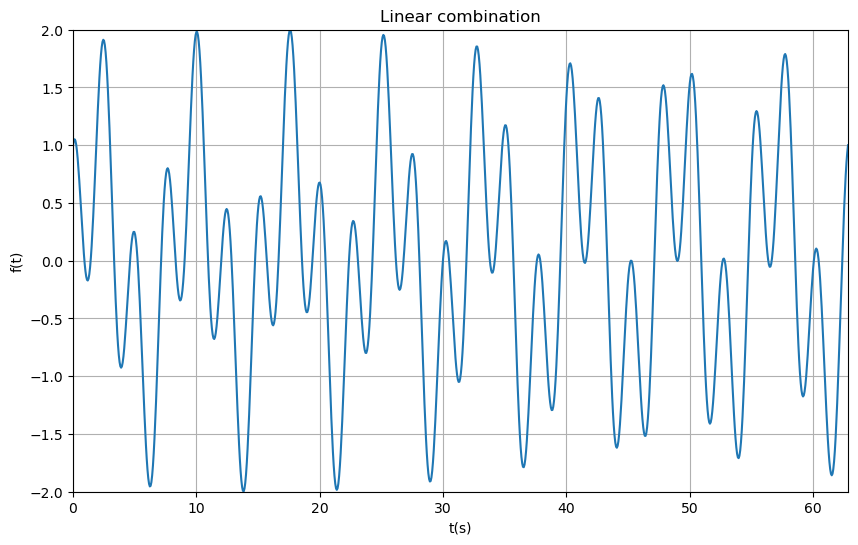

In [6]:
# t_axis for plotting
t = np.linspace(0, 20*np.pi, 1000, endpoint=True)

#define range for x and y
axes_range = [0, 20*np.pi, -2, 2]

#plotting
plt.figure(figsize = (10, 6))
plt.plot(t, function(t))
plt.title('Linear combination');
plt.xlabel('t(s)')
plt.ylabel('f(t)')
plt.axis(axes_range)
plt.grid()
plt.show()


### Fourier analysis:

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

In [7]:
F = np.fft.fft(function(t), t.size)
#print(F)
F_norm = np.abs(F)
print(t.size, F.size)

1000 1000


In [8]:
print(t.size)
print(F_norm.size)

1000
1000


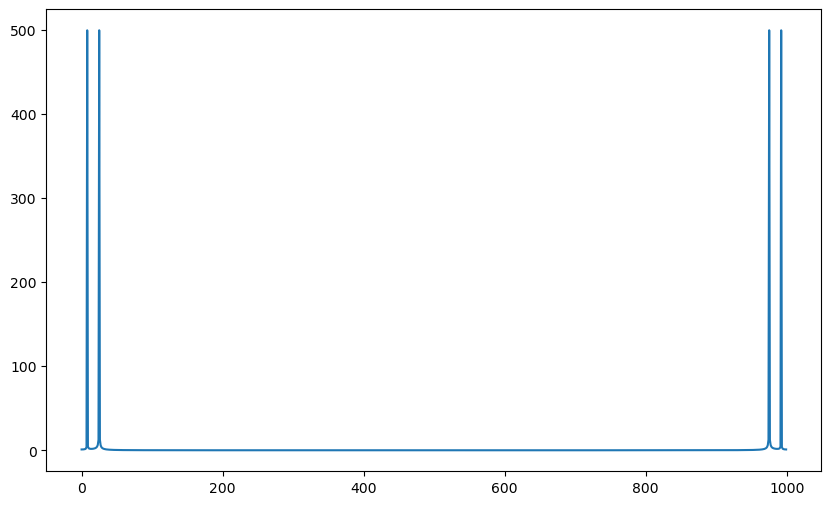

In [9]:
plt.figure(figsize=(10,6))

plt.plot(F_norm)

plt.show()

## Calculate frequencies:

In [10]:
freqs = np.fft.fftfreq(t.size, 20*np.pi/1000)

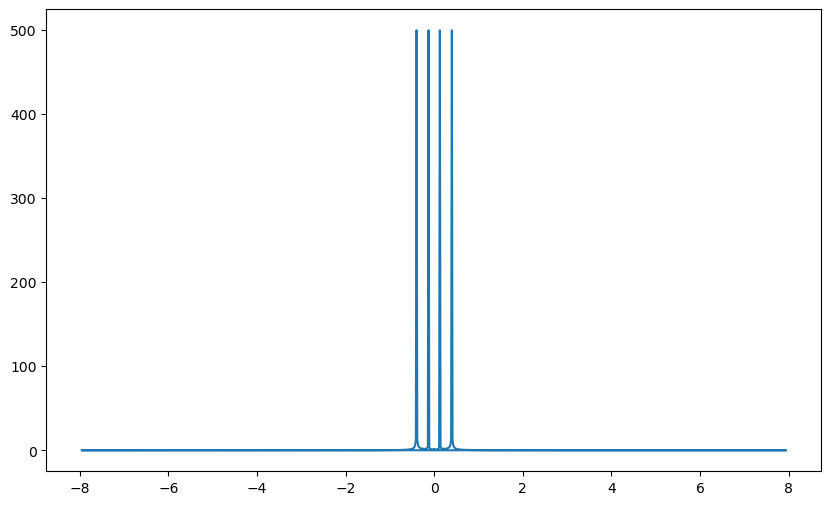

In [11]:
plt.figure(figsize=(10,6))

plt.plot(freqs, F_norm)

plt.show()

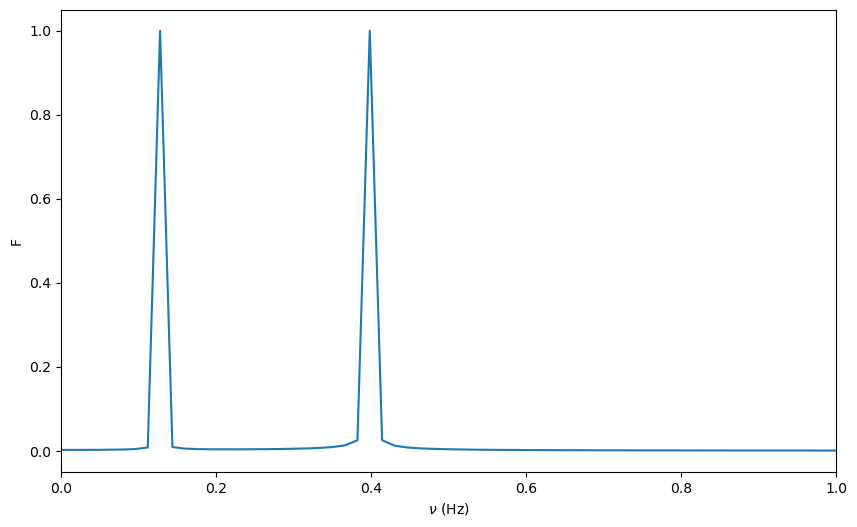

In [12]:
plt.figure(figsize=(10,6))

plt.plot(freqs[0:freqs.size//2], (2/F_norm.size)*F_norm[0:F_norm.size//2])

plt.xlim(0,1)

plt.xlabel(r'$\nu$ (Hz)')
plt.ylabel('F')
plt.show()

In [13]:
print(nu_1, nu_2)

0.12732395447351627 0.3978873577297384


In [14]:
from scipy.signal import find_peaks

In [15]:
amp_Fm = (2/F_norm.size)*F_norm[0:F_norm.size//2]

peaks, properties = find_peaks(amp_Fm, height=0)

print(peaks)

[ 8 25]


In [16]:
print(properties)

{'peak_heights': array([0.99939659, 0.99947223])}


In [17]:
peak_freq1 = freqs[peaks[0]]
peak_freq2 = freqs[peaks[1]]

print(peak_freq1, peak_freq2)

0.12732395447351627 0.3978873577297383


## Inverse Fourier Transform:

In [18]:
#inverse fft

iF = np.fft.ifft(F)

In [19]:
#print(iF)

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


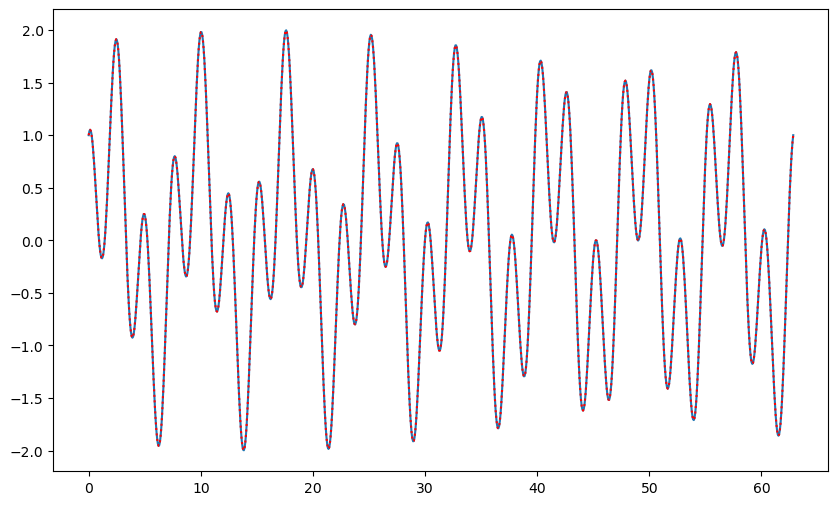

In [20]:
plt.figure(figsize = (10, 6))

plt.plot(t, function(t), linestyle = '-')
plt.plot(t, iF, linestyle = ':', color = 'red')


plt.show()

# Exercise:


Calculate the characteristic frequencies of the following series:

$y(t)=\sum_i^n i\,\cos(i\alpha\,t)$, with $\alpha = 20\pi$

(a) Compute them analytically first.

(b) Then, using Fourier transforms.

In [21]:
def function_series(t, a, n):
    # t - time axis
    # a = 20*pi
    # n is a free parameter, from 0 to n
    
    nu = []
    f = np.zeros(t.size)
    
    for i in range(n+1):
        
        y = i*np.cos(i*a*t)
        
        #Analytical frequencies
        nu.append(i*a/(2*np.pi))
        
        f += y

    # Fourier Analysis
    F_n = np.fft.fft(f, t.size)
    F_m = np.abs(F_n)
    freqs = np.fft.fftfreq(t.size, np.pi/10000)
        
    nu = np.array(nu)    
    return f, nu, freqs, F_m

In [22]:
t = np.linspace(0, np.pi, 10000, endpoint=True)

a = 20*np.pi
n = 10
y_result, nu_result, freqs_result, F_result = function_series(t, a, n)

In [23]:
print(y_result.shape, nu_result.shape, freqs_result.shape, F_result.shape)

(10000,) (11,) (10000,) (10000,)


In [24]:
print(nu_result)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


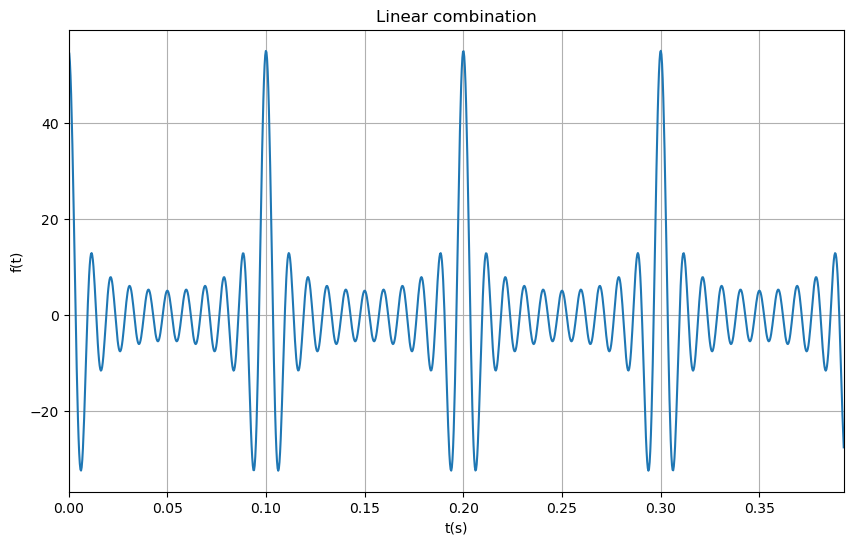

In [25]:
#plotting
plt.figure(figsize = (10, 6))

plt.plot(t, y_result)
plt.title('Linear combination')
plt.xlim(0, np.pi/8)
plt.xlabel('t(s)')
plt.ylabel('f(t)')

#plt.axis(axes_range)
plt.grid()
plt.show()

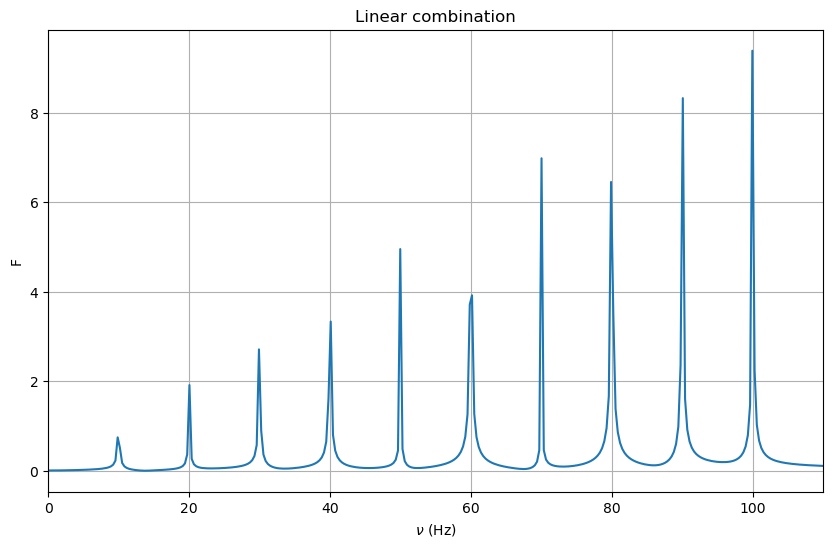

In [26]:
#plotting
plt.figure(figsize = (10, 6))

plt.plot(freqs_result[0:freqs_result.size//2], (2/F_result.size)*F_result[0:F_result.size//2])
plt.title('Linear combination')
plt.xlim(0, 110)
plt.xlabel(r'$\nu$ (Hz)')
plt.ylabel('F')

#plt.axis(axes_range)
plt.grid()
plt.show()

In [27]:
amp_Fm = (2/F_result.size)*F_result[0:F_result.size//2]

peaks, properties = find_peaks(amp_Fm, height=0)

print(peaks)

[ 31  63  94 126 157 189 220 251 283 314]


In [28]:
all_Peaks = freqs_result[peaks]

print(all_Peaks)

[ 9.86760647 20.05352283 29.9211293  40.10704566 49.97465213 60.16056849
 70.02817496 79.89578143 90.08169779 99.94930426]
